# dcd_ch3_hw

## Homework for Chapter 3

In [17]:
from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np

## Problem 1

If we begin at equ 3.7 we can plug in the area of a sphere, $4 \pi x^2$ as $A(x)$. Then, pulling the constant of $1/4 \pi$ out of the integral we get intermediate 2. Then, applying the inetegral, we can evaluate from $x_1$ to $x_2$, after reaching common denominators in intermediate three completing the denominator. Then by using the negetive exponent rule to adjust the $4 \pi * x_1 *x_2 $ we get the final equation

equ (3.7): $$\dfrac{D_g} {\displaystyle \int_{x_1}^{x_2} {\dfrac{\mathrm{d}x}{A(x)}}} $$

intermediate 1: $$ \dfrac{D_g}{\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{4 \pi x^2}} $$

intermediate 2: $$ \dfrac{D_g}{\dfrac{1}{4\pi} \displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{x^2}} $$

int applied: $$\dfrac{D_g}{\dfrac{1}{4\pi} * -(x^{-2}+1)}$$

intermediate 3: $$ \dfrac{D_g} {\dfrac{1}{4\pi} * (\dfrac{x_2}{x_1*x_2} - \dfrac{x_1}{x_1*x_2})} $$

final result (eq. 3.10): $$\dfrac{4 * \pi * D_g * x_1 *x_2}{x_2-x_1} $$


For the second equation (eq 3.11) we must first apply $A(x)$ to be $2 \pi x$. then as last time we can remove the $1/2\pi$ from the integration to get int 2. then integrating with respect that the integral of $dx/x = \ln{|x|}$ we get int 3. by the law of logs we then get the final result



equ (3.7): $$ \dfrac{D_g}{\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{A(x)}} $$

intermediate 1: $$ \dfrac{D_g}{\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{2 \pi  x}} $$

intermediate 2: $$ \dfrac{D_g}{\dfrac{1}{2\pi}\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{x}} $$

intermediate 3: $$ \dfrac{D_g}{\dfrac{1}{2\pi}*(\ln{x_2}-\ln{x_1})}  $$

final result: $$ \dfrac{2*\pi*D_g}{\ln{(x_2/x_1)}} $$

## Problem #2

In [32]:
def testing(waterContent,bulkDensity,oxygenDiff):
    R = 8.3143                     
    n = 20                        
    totalDepth = 0.5                          
    particleDensity = 2650.         
    waterContent = 0.2                 
    respRate = -0.001                        
    temperature = 25.             
    atmPressure = 101.3           
    boundaryLayerCond = 0.01     
    
    # O2 concentration in air [g/m^3]
    boundaryOxygenConc = (0.21 * atmPressure * 1000. * 32. / 
                          (R * (temperature + 273.15))) 
    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent
    
    #  binary diffusion coefficient [m2/s]
    binaryDiffCoeff = (oxygenDiff * (101.3 / atmPressure) 
                * ((temperature + 273.15) / 273.15)**1.75)
    
    bg = 0.9           
    mg = 2.3           
    dg = binaryDiffCoeff * bg * gasPorosity**mg
    
    z, co = gasSolver(boundaryLayerCond, boundaryOxygenConc, 
                      dg, respRate, totalDepth, n)
      
    print ("node   depth [m]   Co [g\m^3]")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.2f" %(i, z[i], co[i]))
    
    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(co[i], -z[i], 'ko')
        
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()



node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      270.12
  3      0.05      266.10
  4      0.08      262.50
  5      0.10      259.28
  6      0.12      256.40
  7      0.15      253.85
  8      0.17      251.60
  9      0.20      249.61
 10      0.22      247.88
 11      0.25      246.38
 12      0.27      245.09
 13      0.30      244.00
 14      0.33      243.08
 15      0.35      242.34
 16      0.38      241.74
 17      0.40      241.28
 18      0.43      240.95
 19      0.45      240.75
 20      0.48      240.65
 21      0.50      0.00


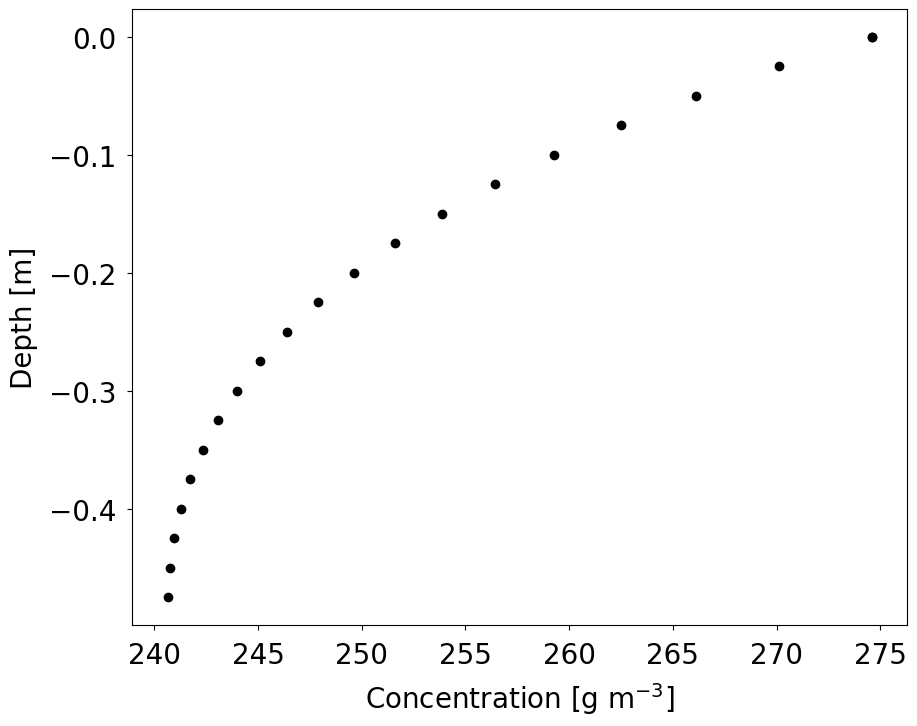

In [33]:
waterContent = 0.2
bulkDensity = 1200.
oxygenDiff = 1.39e-5 #CO2
testing(waterContent,bulkDensity,oxygenDiff)

the above is the original graph, after this will be an increase to the VWC, pb, K_O_2, and K_CO_2

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      270.12
  3      0.05      266.10
  4      0.08      262.50
  5      0.10      259.28
  6      0.12      256.40
  7      0.15      253.85
  8      0.17      251.60
  9      0.20      249.61
 10      0.22      247.88
 11      0.25      246.38
 12      0.27      245.09
 13      0.30      244.00
 14      0.33      243.08
 15      0.35      242.34
 16      0.38      241.74
 17      0.40      241.28
 18      0.43      240.95
 19      0.45      240.75
 20      0.48      240.65
 21      0.50      0.00


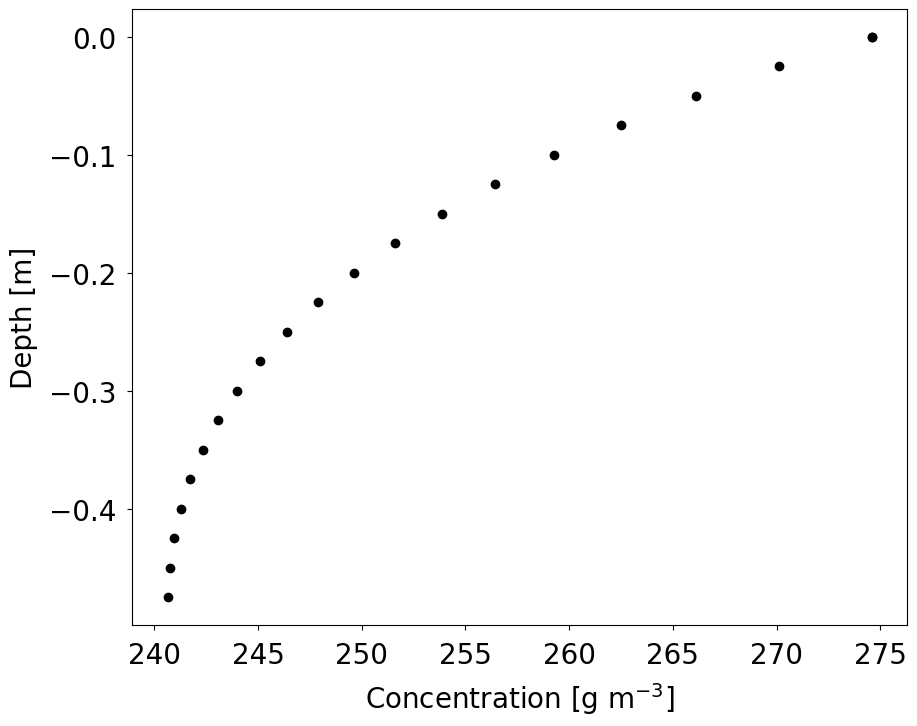

In [37]:
waterContent = 0.4 #increased VWC
bulkDensity = 1200.
oxygenDiff = 1.39e-5 #CO2
testing(waterContent,bulkDensity,oxygenDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      270.12
  3      0.05      266.10
  4      0.08      262.50
  5      0.10      259.28
  6      0.12      256.40
  7      0.15      253.85
  8      0.17      251.60
  9      0.20      249.61
 10      0.22      247.88
 11      0.25      246.38
 12      0.27      245.09
 13      0.30      244.00
 14      0.33      243.08
 15      0.35      242.34
 16      0.38      241.74
 17      0.40      241.28
 18      0.43      240.95
 19      0.45      240.75
 20      0.48      240.65
 21      0.50      0.00


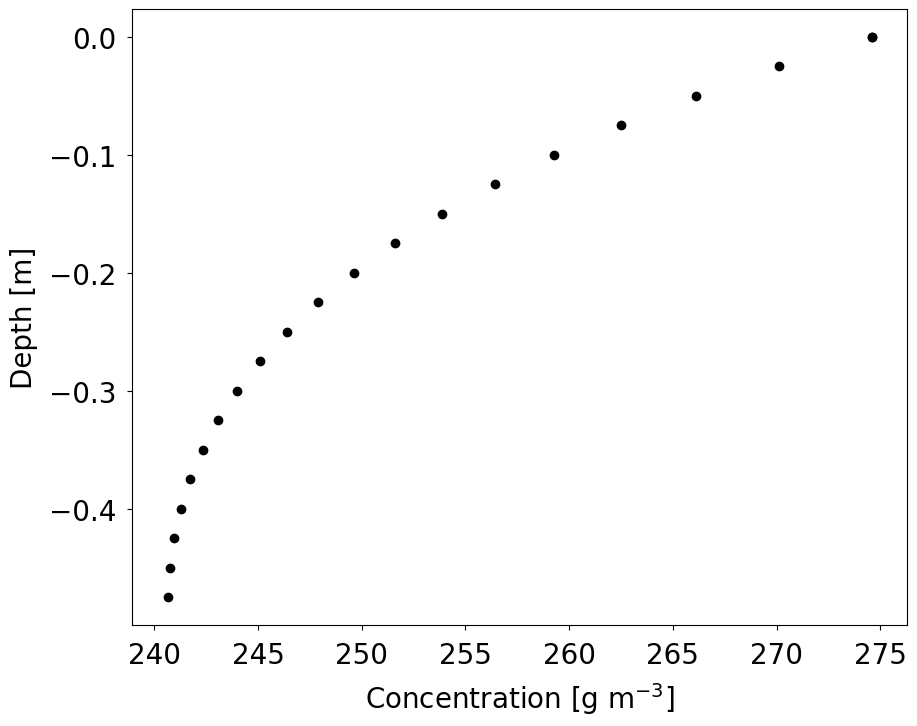

In [34]:
waterContent = 0.1 #half VWC
bulkDensity = 1200.
oxygenDiff = 1.39e-5 #CO2
testing(waterContent,bulkDensity,oxygenDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      271.43
  3      0.05      268.59
  4      0.08      266.05
  5      0.10      263.77
  6      0.12      261.74
  7      0.15      259.94
  8      0.17      258.34
  9      0.20      256.94
 10      0.22      255.72
 11      0.25      254.66
 12      0.27      253.75
 13      0.30      252.97
 14      0.33      252.33
 15      0.35      251.80
 16      0.38      251.38
 17      0.40      251.06
 18      0.43      250.82
 19      0.45      250.68
 20      0.48      250.61
 21      0.50      0.00


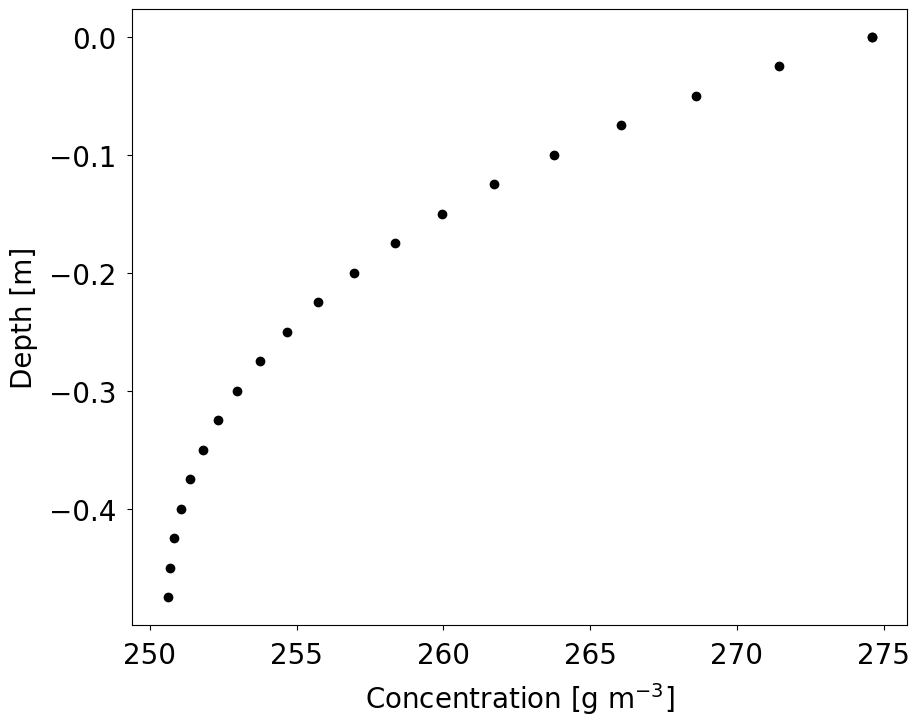

In [35]:
waterContent = 0.2
bulkDensity = 1050.# decreased pb
oxygenDiff = 1.39e-5 #CO2
testing(waterContent,bulkDensity,oxygenDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      266.74
  3      0.05      259.68
  4      0.08      253.35
  5      0.10      247.68
  6      0.12      242.63
  7      0.15      238.15
  8      0.17      234.18
  9      0.20      230.70
 10      0.22      227.66
 11      0.25      225.02
 12      0.27      222.75
 13      0.30      220.83
 14      0.33      219.23
 15      0.35      217.91
 16      0.38      216.86
 17      0.40      216.06
 18      0.43      215.48
 19      0.45      215.12
 20      0.48      214.94
 21      0.50      0.00


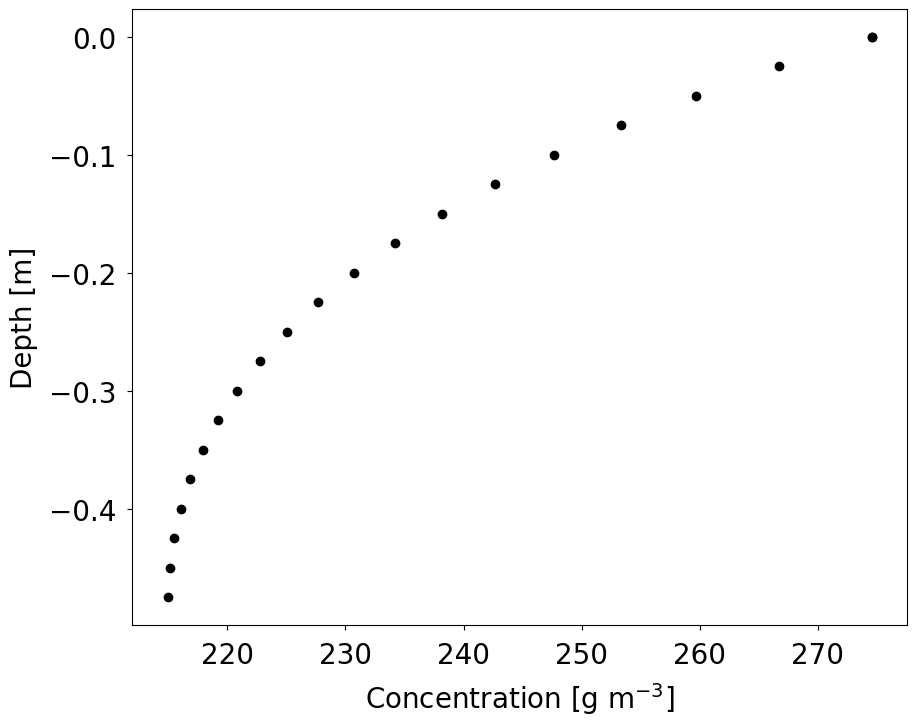

In [23]:
waterContent = 0.2
bulkDensity = 1400. #increased pb
oxygenDiff = 1.39e-5 #CO2
testing(waterContent,bulkDensity,oxygenDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      274.46
  3      0.05      274.35
  4      0.08      274.25
  5      0.10      274.16
  6      0.12      274.08
  7      0.15      274.01
  8      0.17      273.95
  9      0.20      273.89
 10      0.22      273.84
 11      0.25      273.80
 12      0.27      273.77
 13      0.30      273.74
 14      0.33      273.71
 15      0.35      273.69
 16      0.38      273.67
 17      0.40      273.66
 18      0.43      273.65
 19      0.45      273.65
 20      0.48      273.64
 21      0.50      0.00


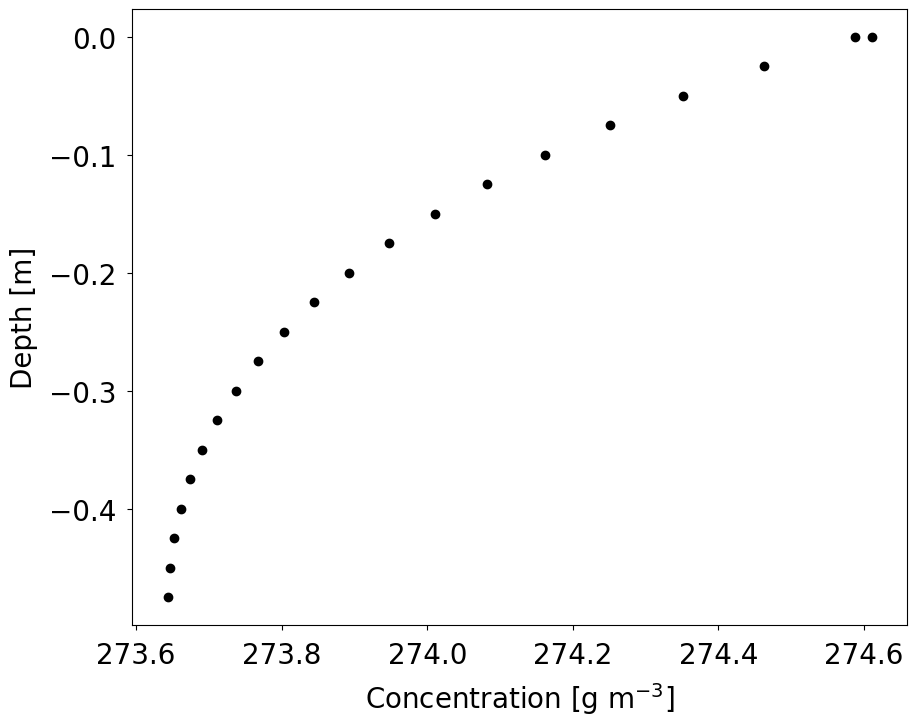

In [38]:
waterContent = 0.2
bulkDensity = 1200.
oxygenDiff = 5e-4  #O2
testing(waterContent,bulkDensity,oxygenDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      274.46
  3      0.05      274.35
  4      0.08      274.25
  5      0.10      274.16
  6      0.12      274.08
  7      0.15      274.01
  8      0.17      273.95
  9      0.20      273.89
 10      0.22      273.84
 11      0.25      273.80
 12      0.27      273.77
 13      0.30      273.74
 14      0.33      273.71
 15      0.35      273.69
 16      0.38      273.67
 17      0.40      273.66
 18      0.43      273.65
 19      0.45      273.65
 20      0.48      273.64
 21      0.50      0.00


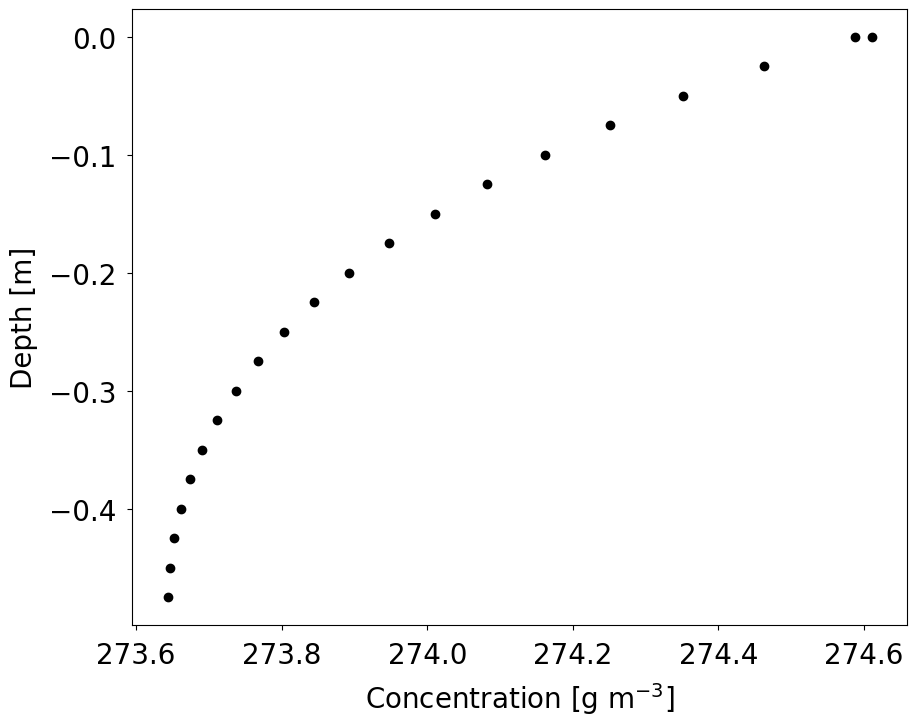

In [25]:
waterContent = 0.4 #increased VWC
bulkDensity = 1200.
oxygenDiff = 5e-4 #O2
testing(waterContent,bulkDensity,oxygenDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      274.46
  3      0.05      274.35
  4      0.08      274.25
  5      0.10      274.16
  6      0.12      274.08
  7      0.15      274.01
  8      0.17      273.95
  9      0.20      273.89
 10      0.22      273.84
 11      0.25      273.80
 12      0.27      273.77
 13      0.30      273.74
 14      0.33      273.71
 15      0.35      273.69
 16      0.38      273.67
 17      0.40      273.66
 18      0.43      273.65
 19      0.45      273.65
 20      0.48      273.64
 21      0.50      0.00


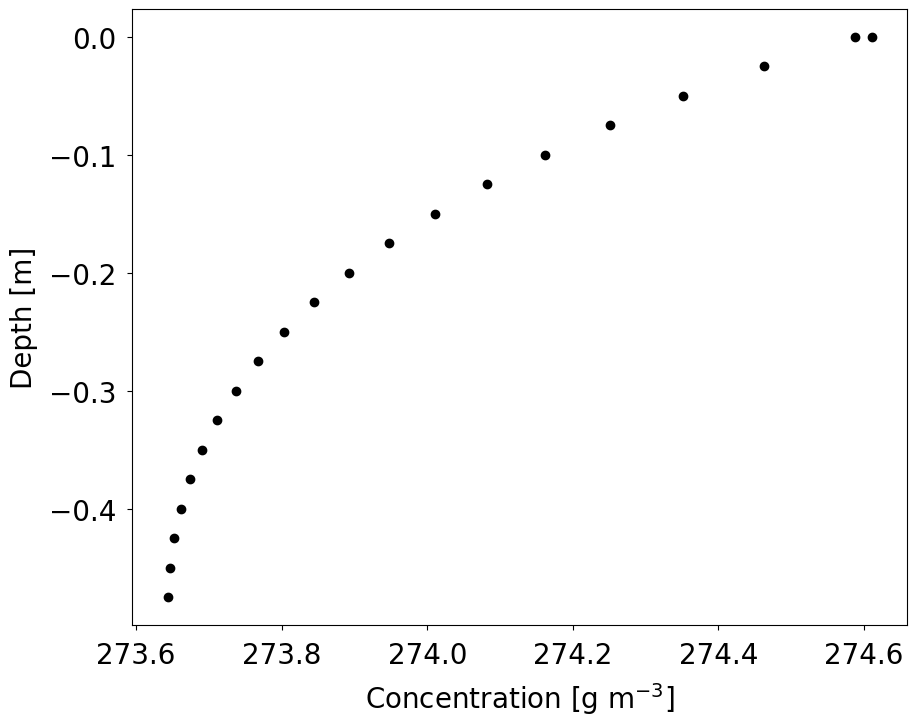

In [26]:
waterContent = 0.1 #decreased VWC
bulkDensity = 1200.
oxygenDiff = 5e-4 #O2
testing(waterContent,bulkDensity,oxygenDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      274.50
  3      0.05      274.42
  4      0.08      274.35
  5      0.10      274.29
  6      0.12      274.23
  7      0.15      274.18
  8      0.17      274.14
  9      0.20      274.10
 10      0.22      274.06
 11      0.25      274.03
 12      0.27      274.01
 13      0.30      273.99
 14      0.33      273.97
 15      0.35      273.95
 16      0.38      273.94
 17      0.40      273.93
 18      0.43      273.93
 19      0.45      273.92
 20      0.48      273.92
 21      0.50      0.00


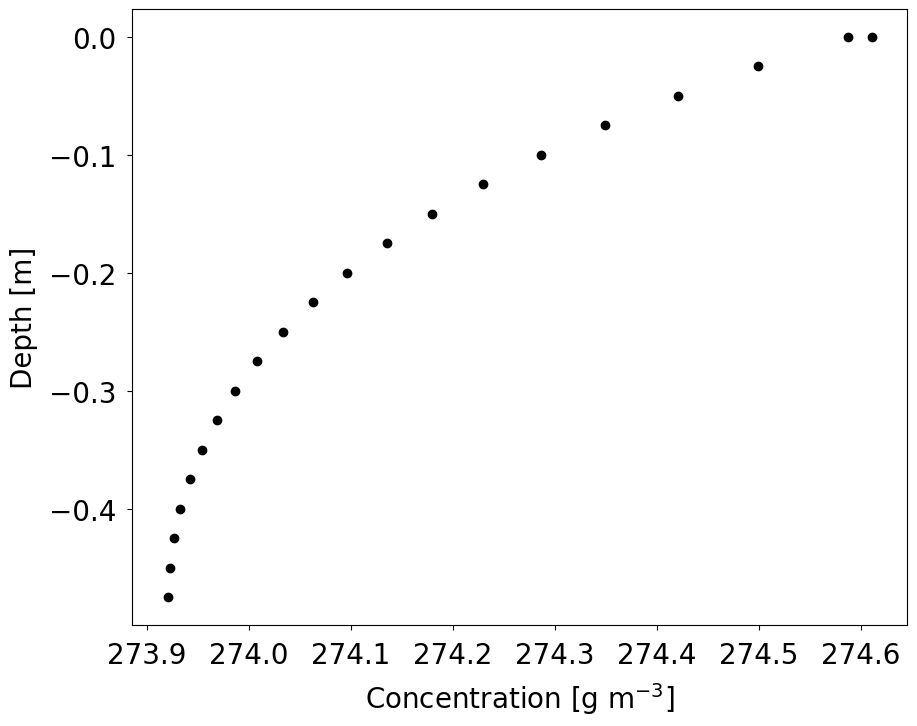

In [27]:
waterContent = 0.2
bulkDensity = 1050. #decreased pb
oxygenDiff = 5e-4 #O2
testing(waterContent,bulkDensity,oxygenDiff)

node   depth [m]   Co [g\m^3]
  0      0.00      274.61
  1      0.00      274.59
  2      0.03      274.37
  3      0.05      274.17
  4      0.08      274.00
  5      0.10      273.84
  6      0.12      273.70
  7      0.15      273.57
  8      0.17      273.46
  9      0.20      273.37
 10      0.22      273.28
 11      0.25      273.21
 12      0.27      273.15
 13      0.30      273.09
 14      0.33      273.05
 15      0.35      273.01
 16      0.38      272.98
 17      0.40      272.96
 18      0.43      272.94
 19      0.45      272.93
 20      0.48      272.93
 21      0.50      0.00


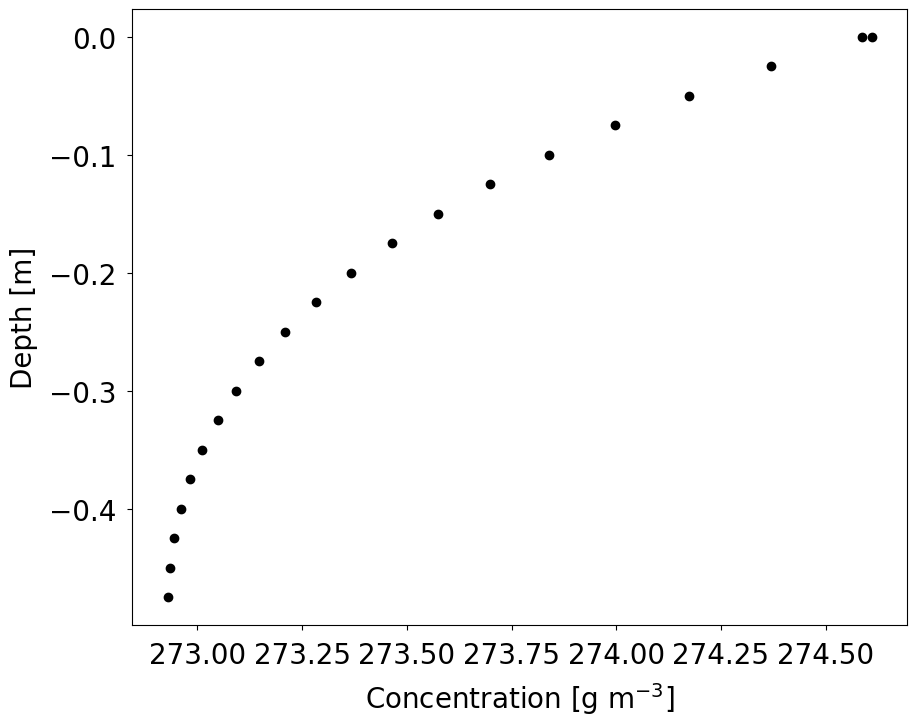

In [28]:
waterContent = 0.2
bulkDensity = 1400. #increased pb
oxygenDiff = 5e-4 #O2
testing(waterContent,bulkDensity,oxygenDiff)

Gas concentration did not drastically change when changing the water content for CO2 and O2(if I coded that funcion properly. Decreased bulk density did however allow for more diffusion and thus higher concentrations at depth and vice versa for higher desities. O2 concetrations did difuse to the lower depths quicker.

## Problem 3